# Covid-19 Analysis

This notebook is a basic analysis for the effects of Covid-19 in Greece. We'll examine what is the relationship between cases, deaths and hospitalizations. We will also discuss about the different variants.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import os

## Data overview

In [2]:
os.chdir('../../Data/02_Cleaned_data')
df = pd.read_csv('cleaned_data.csv')
df.head()

,iso_code,location,date,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions_per_million,weekly_hosp_admissions_per_million,new_tests,new_tests_per_thousand,positive_rate,tests_per_case
0,ALB,Albania,2020-02-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.003,0.0,0.0
1,ALB,Albania,2020-02-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.002,0.0,0.0
2,ALB,Albania,2020-02-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.001,0.0,0.0
3,ALB,Albania,2020-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000,0.0,0.0
4,ALB,Albania,2020-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.003,0.0,0.0


## Map of cases per million in Europe

To have a better understanding of the situation, I think is a good idea to showcase a general overview for each country in Europe. The heatmap shows a graphic representation of the total number of cases per million reported. The countries that have colors closer to red are those with the highest number of cases per million, and those with more white colors have less cases.

In [3]:
total_cases_per_million = df.groupby('iso_code')['new_cases_per_million'].sum()
total_cases_per_million = total_cases_per_million.reset_index()
total_cases_per_million.rename(columns = {'iso_code' : 'iso_a3'}, inplace = True)

In [4]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))[['geometry', 'iso_a3', 'continent']]

In [5]:
europe = pd.merge(total_cases_per_million, countries, on = 'iso_a3')
europe = gpd.GeoDataFrame(europe)
europe = europe[europe['iso_a3'] != 'RUS']

<AxesSubplot:>

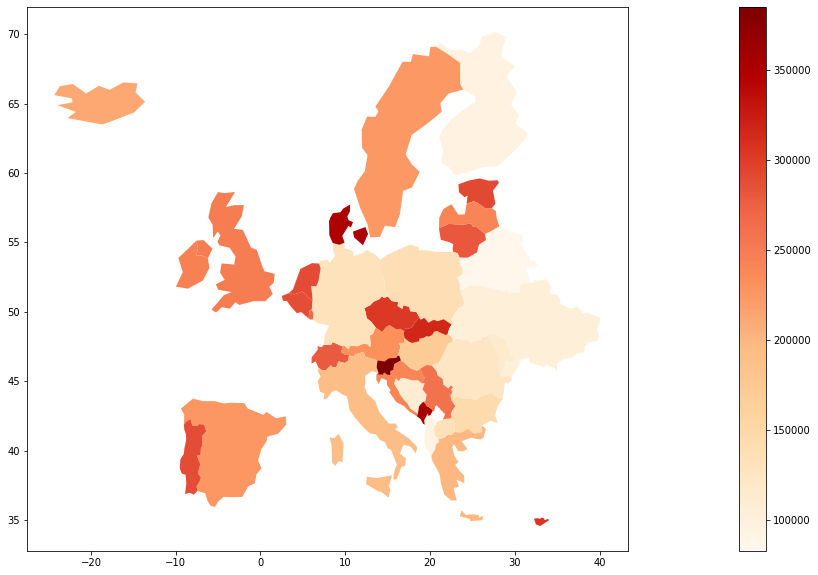

In [6]:
europe.plot(column = 'new_cases_per_million', figsize=(40,10), legend = True, cmap='OrRd')

## Let's talk about Greece

Now it's time to become more specific. First we have to get all the data realted to Greece. As we can see have all the important information to study the relationship of cases, deaths and hospitalizations.

In [7]:
greece = df[df['location'] == 'Greece']
greece.head()

,iso_code,location,date,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions_per_million,weekly_hosp_admissions_per_million,new_tests,new_tests_per_thousand,positive_rate,tests_per_case
12229,GRC,Greece,2020-01-06,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12230,GRC,Greece,2020-01-18,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12231,GRC,Greece,2020-02-12,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12232,GRC,Greece,2020-02-26,1.0,0.0,0.096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12233,GRC,Greece,2020-02-27,2.0,0.0,0.193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## It's time to plot the data

We'll stick to the basics for this analysis. First we plot the nunmber of new cases per million. As we can see for the most part we had a relatively small number of new cases. We can also see that we had about three waves. The first two were not as big in terms of total cases as the last one. We started seening significant increase in the number of new cases at the end of 2021 when the Omicron variant dominated the world. Next we plot the number of deaths per million. In this graph it is more obvious that we hade three waves. As we can see although we have a lot more new cases the number of deaths remains at the same levels it was at the first and the second wave of the pandemic. This shows us that the Omicron variant and the vaccinations probably helped to keep the number of deaths at low levels in comparison to cases. The one negative thing we have to consider is that the number of deaths remains elevated for a longer period of time compared to the previous two waves. Next we plot hospitalizations and ICU which both have the same looks. Again we see that although the cases increase the number of people that need to go to hospitals remain at the same levels as in the previous waves. In the end we plot the number of tests. For the most part there were less than 10000 tests per million every day in Greece. In September of 2021 we see an increase in the number of tests but the cases remain almost the same until end of the year. The test nowdays are more than 40000 per day.That's another important factor on why we see more cases.

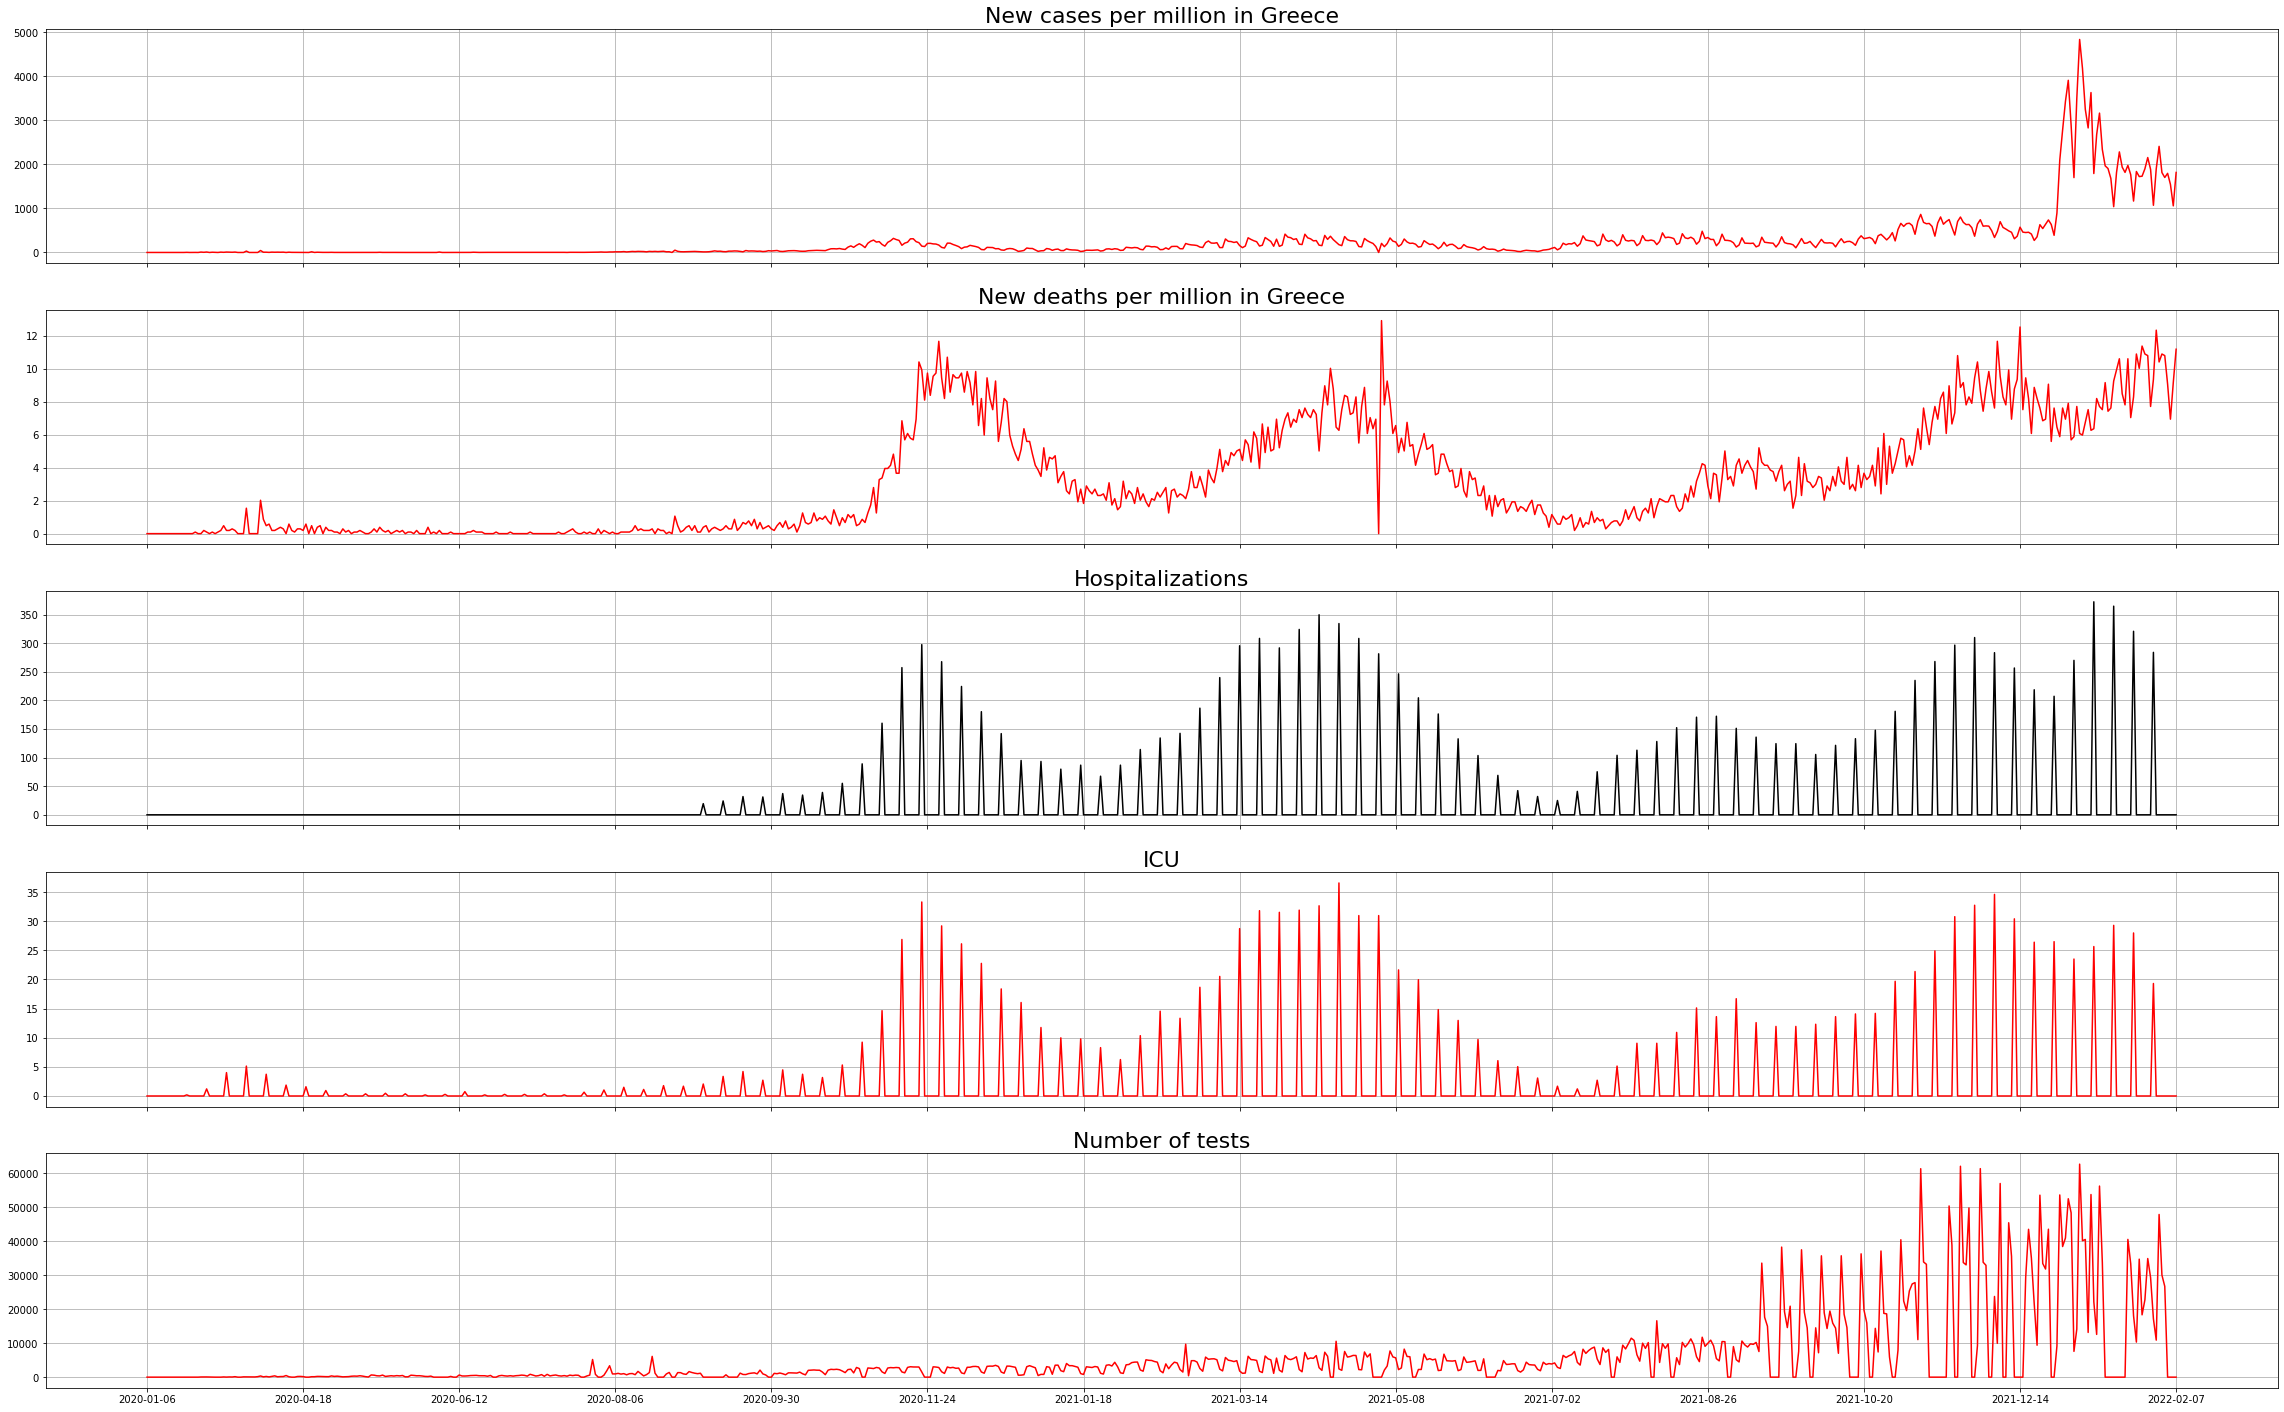

In [42]:
fig, axs = plt.subplots(5, sharex = True, figsize = (40,25))
axs[0].plot(greece['date'], greece['new_cases_per_million'], color = 'red')
axs[0].set_title('New cases per million in Greece', fontsize = 22)
axs[0].grid(True)

axs[1].plot(greece['date'], greece['new_deaths_per_million'], color = 'red')
axs[1].set_title('New deaths per million in Greece', fontsize = 22)
axs[1].grid(True)

axs[2].plot(greece['date'], greece['weekly_hosp_admissions_per_million'], color = 'black')
axs[2].set_title('Hospitalizations', fontsize = 22)
axs[2].grid(True)

axs[3].plot(greece['date'], greece['weekly_icu_admissions_per_million'], color = 'red')
axs[3].set_title('ICU', fontsize = 22)
axs[3].grid(True)

axs[4].plot(greece['date'], greece['new_tests_per_thousand'] * 1000, color = 'red')
axs[4].set_title('Number of tests', fontsize = 22)
axs[4].grid(True)

plt.xticks(greece['date'][0::55])
plt.show()

## Final thoughts

As we saw before

* The number of cases increased especially at the end of 2021
* Deaths remained at the same leves in all three waves
* The same is true of hospitalizations
* The number of tests also increased and that's one reason that new cases spiked.